<a href="https://colab.research.google.com/github/dheerajrathee/IADS_SummerSchool_2019/blob/master/DecisionTrees_IADS_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction**

A **decision tree** is a supervised machine learning model used to predict a target by learning decision rules from features. As the name suggests, we can think of this model as breaking down our data by making a decision based on asking a series of questions.


Based on the features in our training set, the decision tree model learns a series of questions to infer the class labels of the samples. As we can see, decision trees are attractive models if we care about interpretability.

Although the preceding figure illustrates the concept of a decision tree based on categorical targets (**classification**), the same concept applies if our targets are real numbers (**regression**).





In [3]:
# from google.colab import drive
# drive.mount('/gdrive')
# %cd /gdrive/My Drive/IADS-2019-Tree-Codes

# !pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive
/gdrive/My Drive/IADS-2019-Tree-Codes
/gdrive/My Drive/IADS-2019-Tree-Codes


# Dataset for Classification




> **Dataset:**  [Iris dataset](https://scikit-learn.org/stable/datasets/index.html#iris-dataset).



*   **Number of Instances:** 
    *   150 (50 in each of three classes)
*   **Number of Attributes:**
    *   4 numeric, predictive attributes and the class

*   **Attribute Information:**
    *   sepal length in cm
    *   sepal width in cm
    *   petal length in cm
    *   petal width in cm

*   **Classes:**
    *   Setosa (0)
    *   Versicolour (1)
    *   Virginica (2)
    






# Classification Code


In [0]:
from sklearn import datasets  # DATA
from sklearn.model_selection import train_test_split # to Split Train-Test data
from sklearn import tree # To get Decision Tree 
from sklearn import metrics # To generate evaluation metrices
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score


from sklearn.tree import export_graphviz # exporting the tree structure as dot file
from pydotplus.graphviz import graph_from_dot_data # export png image from dot file
from IPython.display import Image, SVG  # Show the image within colab notebook
from graphviz import Source
import matplotlib.pyplot as plt

import pandas as pd # for basic data manipulations 
import numpy as np



### 1. Load Data

In [5]:
#load data and see meta info
iris = datasets.load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

### 2. Explore Data


In [6]:
# print type and shape of data
print(type(iris.data))
print(type(iris.target))

print(iris.data.shape)
print(iris.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(150, 4)
(150,)


### 3. Create Panda Dataframe and do data manipulations

In [7]:
dfCls = pd.DataFrame(iris.data, columns=iris.feature_names)
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Add target data to the panda dataframe
dfCls['target'] = iris.target
dfCls.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### 4. Split the data for Training and Testing

In [9]:
X_train, X_test, y_train, y_test = train_test_split(dfCls.drop(['target'],axis='columns'), iris.target, test_size=0.2,random_state=0, stratify=iris.target)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### 5. Initialise a Decision Tree Classifier

In [0]:
dtClassifier = tree.DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')



> ***Let's dig into*** **[tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)**



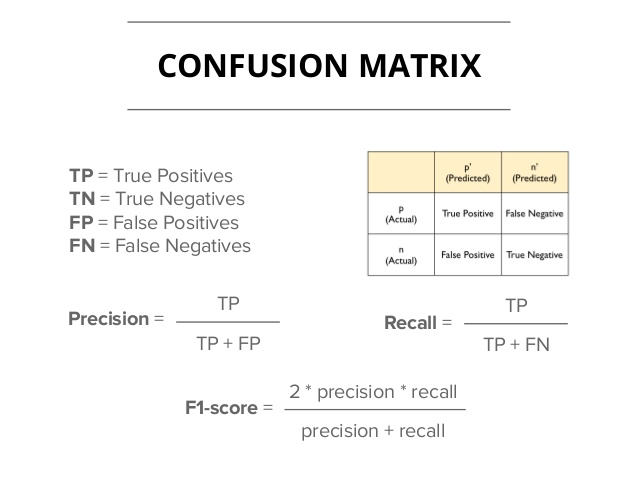

In [12]:
Image('eval-class.jpg', width=800, height=500)

### 6. Model Evaluation on Train data

In [14]:
#perform 10 fold cross validation and plot the CM
CV_predicted = cross_val_predict(dtClassifier, X_train, y_train, cv=10) #CV predicted values (training data)
CV_score = cross_val_score(dtClassifier, X_train, y_train, cv=10) #CV model score (training data)

print("Cross validation Score on train data: ",CV_score.mean())
print("\n")

print("Confusion matrix on CV predictions (train data)")
print(metrics.confusion_matrix(y_train, CV_predicted)) # confusion matrix on CV predictions (train data)
print("\n")

print("Classification report CV predictions (train data)")
print(metrics.classification_report(y_train, CV_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report CV predictions (train data)


Cross validation Score on train data:  0.9333333333333333


Confusion matrix on CV predictions (train data)
[[40  0  0]
 [ 0 36  4]
 [ 0  4 36]]


Classification report CV predictions (train data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        40
  Versicolor       0.90      0.90      0.90        40
   Virginica       0.90      0.90      0.90        40

    accuracy                           0.93       120
   macro avg       0.93      0.93      0.93       120
weighted avg       0.93      0.93      0.93       120



### 7. Let's fit the DT model on Training data and perform prediction with the Test data 

In [0]:
dtClassifier.fit(X_train,y_train)

y_predicted = dtClassifier.predict(X_test)

### 8. Model Evaluation on Test Data

In [16]:
mdl_score = dtClassifier.score(X_test,y_test) #model score (test data)
print ("Model Score on test data:",mdl_score)
print("\n")

print("Confusion matrix (test data)")
print(metrics.confusion_matrix(y_test, y_predicted)) #confusion matrix (test data)
print("\n")

print("Classification report (test data)")
print(metrics.classification_report(y_test, y_predicted, target_names=['Setosa', 'Versicolor', 'Virginica'])) # classification report (test data)

Model Score on test data: 0.9666666666666667


Confusion matrix (test data)
[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]


Classification report (test data)
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        10
  Versicolor       0.91      1.00      0.95        10
   Virginica       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 10. Plot the trained DT structure for visualisation

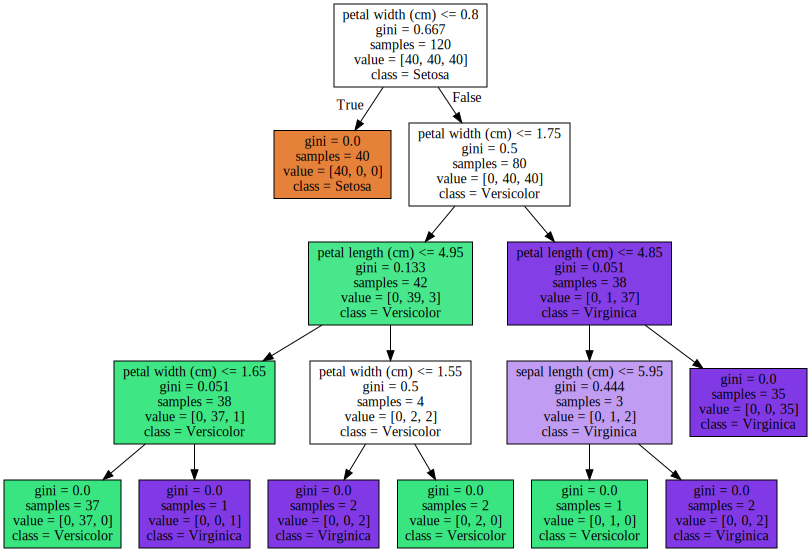

In [22]:
# Plot the smallest tree
graph = Source(export_graphviz(dtClassifier, out_file=None, 
                               feature_names=X_train.columns, filled=True, 
                               class_names=['Setosa', 'Versicolor','Virginica']))
SVG(graph.pipe(format='svg'))

# Dataset for Regression



> **Dataset:**  [Boston house-price](https://scikit-learn.org/stable/datasets/index.html#boston-dataset)



*   **Number of Instances:** 
    *   	506
*   **Number of Attributes:**
    *   13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

*   **Attribute Information:**
    *   CRIM per capita crime rate by town
    *   ZN proportion of residential land zoned for lots over 25,000 sq.ft.
    *   INDUS proportion of non-retail business acres per town
    *   CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    *   NOX nitric oxides concentration (parts per 10 million)
    *   RM average number of rooms per dwelling
    *   AGE proportion of owner-occupied units built prior to 1940
    *   DIS weighted distances to five Boston employment centres
    *   RAD index of accessibility to radial highways
    *   TAX full-value property-tax rate per \$10,000
    *   PTRATIO pupil-teacher ratio by town
    *   B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    *   LSTAT \% lower status of the population
    *   MEDV Median value of owner-occupied homes in \$1000’s








# Regression Code

### 1. Load Data

In [23]:
#load data and see meta info
boston = datasets.load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

### 2. Explore Data

In [24]:
# print type and shape of data
print(type(boston.data))
print(type(boston.target))

print(boston.data.shape)
print(boston.target.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(506, 13)
(506,)


### 3. Create Panda Dataframe and do data manipulations

In [25]:
dfReg = pd.DataFrame(boston.data, columns=boston.feature_names)
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [26]:
# Add target data to the panda dataframe
dfReg['target'] = boston.target
dfReg.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [27]:
dfReg.describe() # Description of data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [28]:
dfReg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


### 4. Split the data for Training and Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(dfReg.drop(['target'],axis='columns'),boston.target,test_size=0.1,random_state=0)
print(X_train.shape)
print(X_test.shape)

(455, 13)
(51, 13)


### 5. Initialise a Decision Tree Regressor

In [0]:
dtRegressor = tree.DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')



> ***Let's dig into*** **[tree.DecisionTreeRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)**






### 6. Model Performance on Train data

Crossvalidation Coefficient of determination on training set : 0.6258486181575219




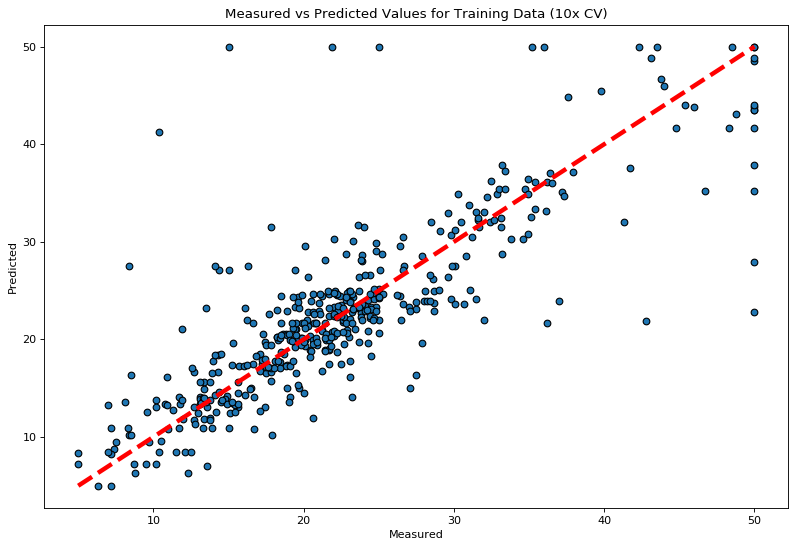

In [32]:
CV_predicted = cross_val_predict(dtRegressor, X_train, y_train, cv=10) # CV prediction on Train data
r2_score_cv = cross_val_score(dtRegressor, X_train, y_train, cv=10).mean() # CV model score on Train data
print ("Crossvalidation Coefficient of determination on training set :",r2_score_cv)
print("\n")
# Plot measured values vs predicted values Training Data
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_train, CV_predicted, edgecolors=(0, 0, 0))
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Training Data (10x CV)')
plt.show()

### 7.  Let's fit the DT model on Training data and perform prediction with the Test data 

In [0]:
dtRegressor.fit(X_train,y_train)

y_predicted = dtRegressor.predict(X_test)

### 8. Model Performance on Test data

In [34]:
r2_score = dtRegressor.score(X_test,y_test) #R2 Score
print ("Coefficient of determination on test set: ",r2_score)

mse_score = metrics.mean_squared_error(y_test, y_predicted) #Mean Squared Error
print ("\nMean Squared Error on test set :",mse_score)

Coefficient of determination on test set:  0.6253761252920578

Mean Squared Error on test set : 32.22666666666667


### 9. Visualisation

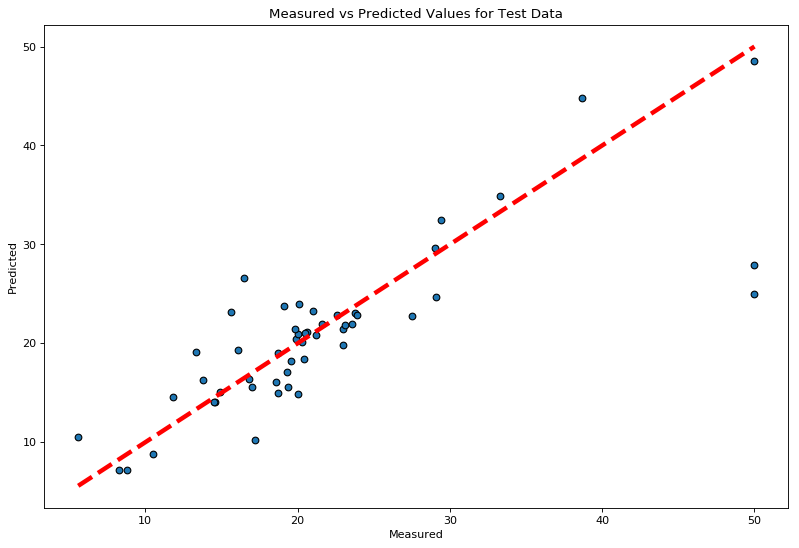

In [37]:
# Plot measured values vs predicted values
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(y_test, y_predicted, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Measured vs Predicted Values for Test Data')
plt.show()

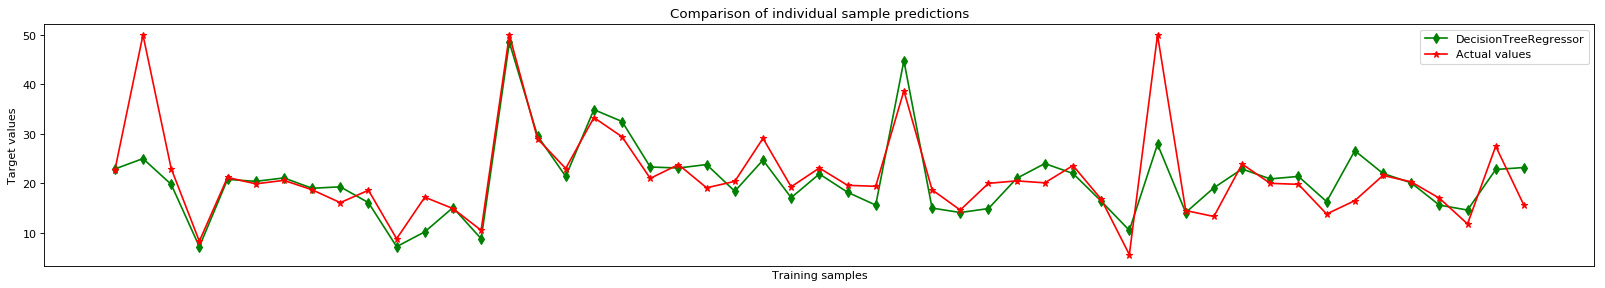

In [38]:
# Plot a one-to-one comparison of measured values vs predicted values
plt.figure(num=None, figsize=(25, 4), dpi=80, facecolor='w', edgecolor='k')
plt.plot(y_predicted, 'gd-', label='DecisionTreeRegressor')
plt.plot(y_test, 'r*-', label='Actual values')
plt.tick_params(axis='x', which='both', bottom=False, top=False,
                labelbottom=False)
plt.ylabel('Target values')
plt.xlabel('Training samples')
plt.legend(loc="best")
plt.title('Comparison of individual sample predictions')
plt.show()

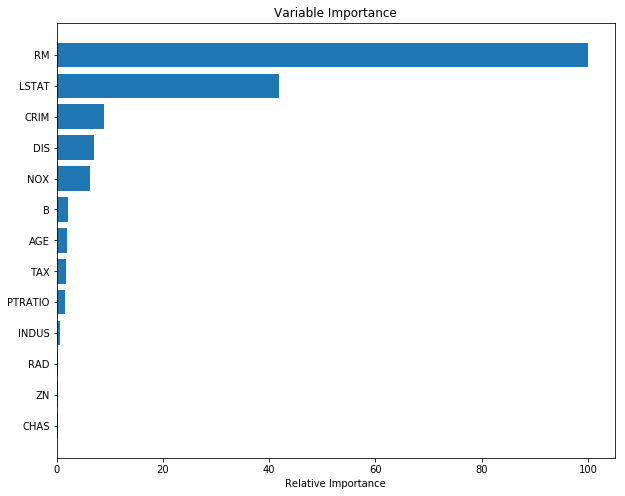

In [39]:
# #############################################################################
# Plot feature importance
feature_importance = dtRegressor.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = range(X_train.shape[1]);

plt.figure(figsize=(10,8))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')

plt.show()